In [1]:
import os
from annot import annotations
import matplotlib.pyplot as plt
from matplotlib import image
import cv2
import utility
import numpy as np
import configurations
import model_gen
import tensorflow as tf

In [2]:
data_loader = annotations.Data()
util = utility.Util()
config = configurations.Configuration()

In [3]:
df = util.get_dataframe()

In [4]:
sample = list(df.iloc[1000])

In [5]:
im = util.imread_from_id(sample[0])
keypoints = np.array(sample[1:])

In [7]:
keypoints

array([810, 535, 757, 451, 786, 356, 796, 353, 743, 438, 709, 538, 791,
       355, 770, 241, 763, 213, 747, 144, 786, 352, 791, 294, 758, 244,
       782, 238, 806, 293, 796, 367, 779, 323])

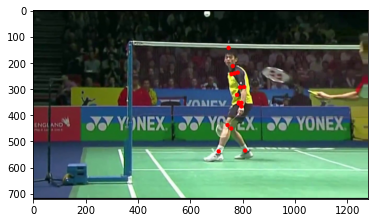

In [8]:
plt.imshow(util.to_rgb(util.draw_keypoints(im, keypoints, 8)))

In [32]:
#model = tf.keras.models.load_model("models/model_v6/")
model = tf.keras.models.load_model("models/model_v8_vgg/")
#model.summary()

In [33]:
#test_im = cv2.imread(os.path.join(config.IMAGES_BASE_DIR, "test", "000563328.jpg"))
test_im = im.copy()

In [34]:
rescaled = test_im / 255

In [35]:
resized = cv2.resize(rescaled, (224,224))

In [36]:
y_pred = model.predict(resized.reshape(1,224,224,3))

1/1 [==============================] - 0s 109ms/step


In [37]:
y_pred = y_pred.ravel()

In [38]:
y_pred

array([533.19135, 531.5111 , 529.1341 , 537.25244, 530.07983, 528.99725,
       529.0688 , 528.2481 , 533.6838 , 529.9376 , 532.29736, 530.18   ,
       533.80133, 526.1259 , 529.473  , 532.2634 , 541.00055, 537.8029 ,
       522.76013, 524.8404 , 536.0786 , 527.5238 , 532.8554 , 536.7208 ,
       525.5907 , 529.2465 , 529.24554, 526.10626, 532.2219 , 532.22644,
       531.489  , 526.9866 , 535.30347, 542.118  ], dtype=float32)

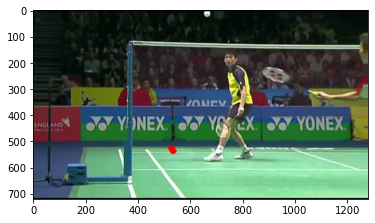

In [39]:
plt.imshow(util.to_rgb(util.draw_keypoints(test_im, y_pred, 7)))

In [40]:
model_names = os.listdir("./models")

summary_list = []
for model_name in model_names:
    m = tf.keras.models.load_model("models/{0}/".format(model_name))
    m.summary(print_fn=lambda x: summary_list.append(x))
    short_model_summary = "\n".join(summary_list)

In [41]:
for item in summary_list:
    print(item)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 128)      0         
 2D)                                                    

In [ ]:
from keras.utils.vis_utils import plot_model 

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)